<a href="https://colab.research.google.com/github/Rishilshajan/Data_Science_Tutorial/blob/main/Data_Science1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Step 1: Business Understanding
### Goal: Predict whether a machine will fail soon using sensor data. This helps factories prevent breakdowns before they happen (Predictive Maintenance).

In [ ]:
# 📦  Import Libraries

# pandas is used for loading, handling, and analyzing structured data (like tables).
import pandas as pd

# numpy is used for numerical operations, especially on arrays and numerical datasets.
import numpy as np

# seaborn is a visualization library based on matplotlib that provides beautiful statistical plots.
import seaborn as sns

# matplotlib is the base Python plotting library used to create static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# train_test_split is used to split the dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

# StandardScaler is used to scale/normalize the data so that features have mean=0 and std=1.
from sklearn.preprocessing import StandardScaler

# LogisticRegression is a classification model that predicts binary outcomes (e.g., fail or not fail).
from sklearn.linear_model import LogisticRegression

# classification_report gives precision, recall, f1-score for each class.
# confusion_matrix helps evaluate how well the model is performing.
# accuracy_score gives the overall percentage of correct predictions.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# joblib is used to save and load models or scalers efficiently (persistence of Python objects).
import joblib

#📊 Step 2: Data Collection
#Goal:
Gather or generate meaningful sensor data from machines.

#What we did:
###Created a synthetic dataset of 10,000 rows simulating:

* Temperature

* Vibration

* Pressure

* Rotational Speed

* Tool Wear

* Machine Age

Failure Label (0 = Healthy, 1 = Failing)

Real-world analogy:
Sensors in a factory continuously log this kind of data. Here we mimicked that process.

In [ ]:
# 📦  Load the Dataset
df = pd.read_csv("/content/machine_data_large.csv")
df.head()  # Show the first 5 rows of data

,temperature,vibration,pressure,rotational_speed,tool_wear,machine_age,failure
0,102.927953,0.004496,176.437879,2411.596893,32.469826,6.0,1
1,70.284874,0.001935,123.842788,2942.993830,21.926077,6.0,0
2,71.700118,0.002325,116.433503,3247.915527,23.501492,5.0,0
3,70.871523,0.001866,107.851939,2558.343845,19.308241,5.0,0
4,76.047007,0.001832,135.089403,2921.673779,20.224079,1.0,0


#🧹 Step 3: Data Preparation (Cleaning & Preprocessing)
##Goal:
Make the data usable for analysis and model training.


##Actions taken:

Filled missing values with column-wise mean.

Converted the target column (failure) into numeric labels.

Separated features (X) and target (y).

Why this matters:
Dirty or inconsistent data can lead to poor models. Cleaning ensures quality.



In [ ]:
# 📦  Data Overview
print("Data Types and Null Values:")
df.info()  # See columns, data types, and non-null counts
print("\nNull values in each column:")
print(df.isnull().sum())  # Count missing values per column

Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       9900 non-null   float64
 1   vibration         9900 non-null   float64
 2   pressure          9900 non-null   float64
 3   rotational_speed  9900 non-null   float64
 4   tool_wear         9900 non-null   float64
 5   machine_age       9900 non-null   float64
 6   failure           10000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 547.0 KB

Null values in each column:
temperature         100
vibration           100
pressure            100
rotational_speed    100
tool_wear           100
machine_age         100
failure               0
dtype: int64


In [ ]:
# 📦  Data Cleaning
hi # Fill missing values using the column mean (safe for numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df)

      temperature  vibration    pressure  rotational_speed  tool_wear  \
0      102.927953   0.004496  176.437879       2411.596893  32.469826   
1       70.284874   0.001935  123.842788       2942.993830  21.926077   
2       71.700118   0.002325  116.433503       3247.915527  23.501492   
3       70.871523   0.001866  107.851939       2558.343845  19.308241   
4       76.047007   0.001832  135.089403       2921.673779  20.224079   
...           ...        ...         ...               ...        ...   
9995    97.117431   0.003783  184.553054       2366.472435  32.306000   
9996    85.468187   0.004084  134.077536       2947.988625  38.908073   
9997    86.611265   0.003154  132.942896       2639.499719  32.863080   
9998    70.943594   0.001794  105.513352       3049.116920  16.614722   
9999    92.348577   0.004802  145.740115       2600.731999  31.116432   

      machine_age  failure  
0             6.0        1  
1             6.0        0  
2             5.0        0  
3      

#📊 Step 4: Exploratory Data Analysis (EDA)
##Goal:
Understand relationships, patterns, and distributions in data.

##What we visualized:

Correlation heatmap → to see which features are related.

Class distribution plot → to check if dataset is balanced.

Boxplot of temperature vs failure → to spot trends.

##Insights:
Failing machines typically had higher temperature and tool wear.

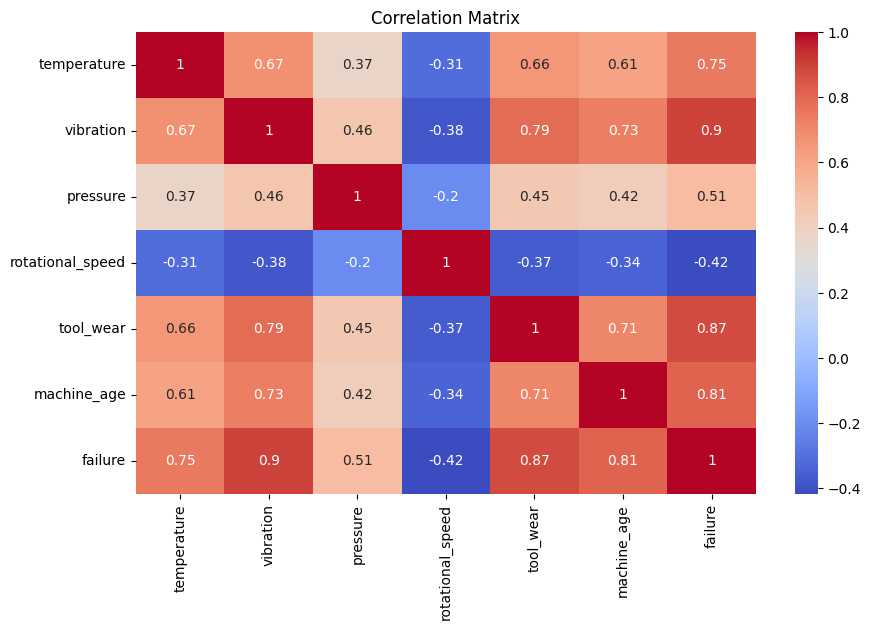

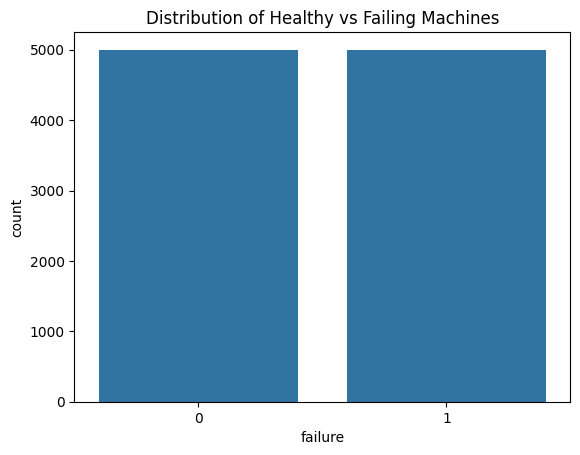

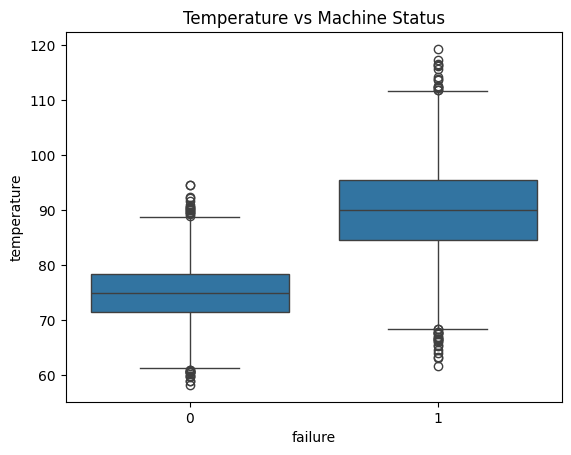

In [ ]:
# 📦 Exploratory Data Analysis (EDA)

# Create a figure with custom size for the heatmap
plt.figure(figsize=(10, 6))

# Plot a heatmap of the correlation matrix between all numerical features
# df.corr() computes the Pearson correlation between features
# annot=True displays the correlation values in the cells
# cmap='coolwarm' uses a color scale from cool (blue) to warm (red)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Show the heatmap plot
plt.show()

# ------------------------------------------------------

# Create a count plot (bar plot) to show how many healthy (0) and failing (1) machines there are
# This helps to check class balance (is the dataset balanced?)
sns.countplot(x='failure', data=df)

# Add a title to the class distribution chart
plt.title("Distribution of Healthy vs Failing Machines")

# Show the count plot
plt.show()

# ------------------------------------------------------

# Create a boxplot to show how temperature varies between healthy and failing machines
# x='failure' groups the data into healthy and failing machines
# y='temperature' plots the distribution of temperatures in each group
sns.boxplot(x='failure', y='temperature', data=df)

# Add a title to explain what the plot shows
plt.title("Temperature vs Machine Status")

# Show the boxplot
plt.show()

#🧠 Step 5: Modeling
##Goal:
Train a machine learning model to learn from the past data.

##Model used:
✅ Logistic Regression – good for binary classification (0 or 1)

##Process:

Split data: 80% for training, 20% for testing.

Scaled features using StandardScaler.

Trained model using X_train_scaled and y_train.

In [ ]:
in # 📦 Step 7: Feature Selection and Preprocessing
# Select the input features (independent variables) by dropping the target column 'failure'
X = df.drop('failure', axis=1)

# Select the target variable (dependent variable), which we want to predict
y = df['failure']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler object to standardize the feature values
scaler = StandardScaler()

# Fit the scaler on training data and apply transformation (standardize)
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data using the training set’s parameters
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
# print(X_test_scaled)
# print(y_train)
# print(y_test)

[[-7.03268654e-01 -7.48737352e-01  8.99215617e-02 -8.48047449e-01
  -4.19422983e-01 -1.39492010e+00]
 [-3.29485697e-01 -1.38628825e+00  2.47918232e-01  1.19509030e+00
  -1.33633007e+00 -1.02248376e+00]
 [ 2.02070691e+00  4.91816954e-01  1.26302342e+00 -2.85739772e-01
   2.87481161e-01  1.21213427e+00]
 ...
 [ 7.12799872e-02  4.08309588e-01 -2.43531090e+00 -4.72111495e-01
   2.25329696e+00  8.39697933e-01]
 [-1.43641044e-03  8.95824431e-01  9.13112253e-01 -1.25946274e+00
   5.82904784e-01  9.48252545e-02]
 [-1.18934526e-01 -9.60859443e-01  1.16913283e+00  8.19634047e-01
  -6.79118596e-01  9.48252545e-02]]


In [ ]:
# 📦 Step 8: Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)  # Train the model on scaled data

LogisticRegression()

#📈 Step 6: Model Evaluation
##Goal:
Check how well the model performs.

##Metrics used:

✅ Accuracy – overall correct predictions.

✅ Confusion Matrix – breakdown of true vs false predictions.

✅ Precision, Recall, F1-score – deeper insight into model quality.

##Observation:
High accuracy when dataset is balanced. Otherwise, model might only predict “healthy” class.

In [ ]:
# 📦 Step 9: Model Evaluation

y_pred = model.predict(X_test_scaled)       # 👉 Use the trained model to predict outcomes on test data

# Display performance metrics

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))     # 👉 Shows TP, TN, FP, FN — helps understand how well model predicts each class

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # 👉 Gives precision, recall, f1-score for each class

print("Accuracy:", accuracy_score(y_test, y_pred))  # 👉 Prints overall accuracy (correct predictions / total)

Confusion Matrix:
[[1012    1]
 [   0  987]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9995


In [ ]:
# 📦 Step 10: Save the Model
# Save the trained model to a file using joblib
joblib.dump(model, "machine_failure_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Also save the scaler for future input transformation

['scaler.pkl']

#🚀 Step 7: Deployment Simulation
##Goal:
Use the trained model to make predictions on new unseen data.

##What we did:

Saved model and scaler using joblib.

Simulated new sensor input.

Scaled the new input.

Used the model to predict whether the machine is failing.

##Output:
“Machine is Healthy” or “Machine is Failing”



In [ ]:
# 📦 Step 11: Deployment Simulation (Make Prediction)

# Step 1: Define a new sample machine's sensor data
# Format: [temperature, vibration, pressure, rotational_speed, tool_wear, machine_age]
new_machine_data = [[345, 0.0035, 140, 2900, 35, 8]]  # 👈 A machine that might be failing (high values)

# Step 2: Load the scaler used during training
# We must scale the new input data the same way the training data was scaled
loaded_scaler = joblib.load("scaler.pkl")  # 👈 Load the previously saved StandardScaler object

# Step 3: Apply the same transformation (standardization) to new input
new_machine_data_scaled = loaded_scaler.transform(new_machine_data)  # 👈 Scale new data
print(new_machine_data_scaled)

# Step 4: Load the trained prediction model
loaded_model = joblib.load("machine_failure_model.pkl")  # 👈 Load the previously trained and saved model

# Step 5: Use the model to predict if the machine is failing (1) or healthy (0)
prediction = loaded_model.predict(new_machine_data_scaled)  # 👈 Predict the outcome

# Step 6: Display the prediction result
print("\nPrediction for new machine:")
print("Machine is Failing" if prediction[0] == 1 else "Machine is Healthy")  # 👈 Print human-readable result

[[2.62071693e+01 4.56184042e-01 8.26941110e-01 2.68442519e-04
  8.78214701e-01 8.39697933e-01]]

Prediction for new machine:
Machine is Failing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
